Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All). Do NOT add any cells to the notebook!

Make sure you fill in any place that says `YOUR CODE HERE` or _YOUR ANSWER HERE_ , as well as your name and group below:

In [1]:
NAME = "Gregor Vandak, Alan Kachmazov, Julian Drexler"
STUDENTID = "12128763, 11741045, 52007920"
GROUPID = "13";

# Assignment 5 (Group)
In Assignment 2, as a group, you trained yourselves in accessing and characterising two data sources. You also sketched out a data-science project based on these data sources. In this assignment, based on this project idea, you should select, implement, and describe 3 appropriate visualisations.

The following materials provide the necessary background:
* the slide deck on visualisations (Unit 5) and the corresponding notebook;
* Chapter 3 of "Data Science from Scratch"
* the mandatory read on "Task-Based Effectiveness of Basic Visualizations" available from MyLearn: _B. Saket, A. Endert and Ç. Demiralp (2019), "Task-Based Effectiveness of Basic Visualizations," in IEEE Transactions on Visualization and Computer Graphics, vol. 25, no. 7, pp. 2505-2512, DOI: 10.1109/TVCG.2018.2829750_

Requirements:
* Mandatory reading: Study the Saket et al. (2019) paper and refer explicitly to the task types, pros & cons of different visualisations as established by these authors when answering the questions on this assignment.
* The visualisation should fit the chosen tasks on the data sets.
* You should employ at least two different types of visualisations. Even if two tasks in two steps below were identical (e.g., two aggregation tasks), you would be expected to select a different visualisation for each. 
* As opposed to Assignment 2, you are expected to use pandas to represent and to prepare the data sets for visualisation.
* As for the Assignment 2 data sets, to avoid confusions:
  * Use the genuine ones, not the manipulated ones (having anomalies introduced). 
  * If you worked with excerpts (samples) from the original and genuine datasets, you may continue using these. You are also free to use the complete datasets, but this is not expected
  * Please stick to your project description in Assignment 2 when choosing tasks and corresponding visualisations.

-----
## Step 1 (6 points)

Select, implement and describe one visualisation for data source 1 (in isolation from data source 2).

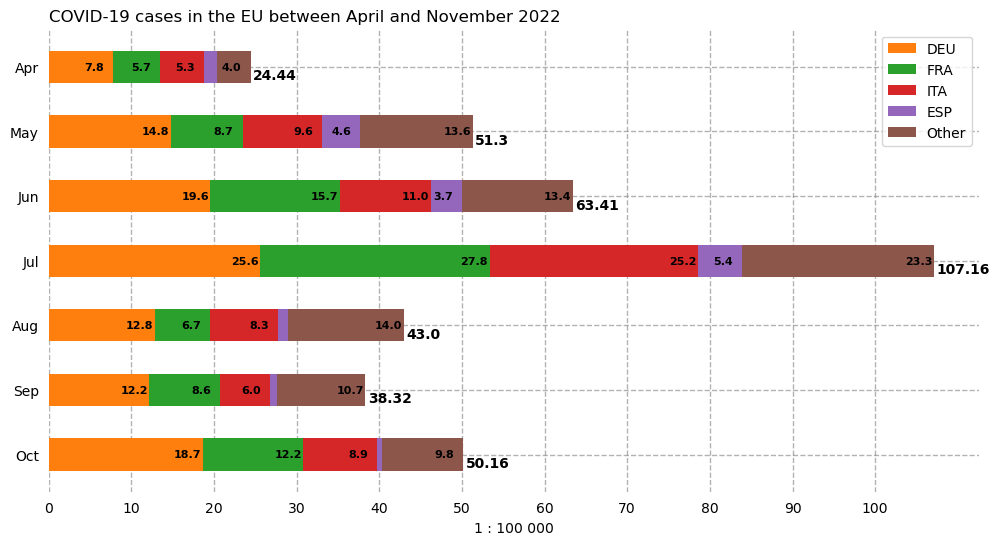

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import datetime
import numpy as np


data = pd.read_csv('./data/data_notebook-1_extcovid.csv')


# DATA PREPARATION


#we sort the countries by population so we can show them in the plot later
sorted_countries = data.groupby('countryterritoryCode')['popData2020'].mean().sort_values(ascending=False).index.tolist()
#we aggregate the cases for each country by month
temp_country_cases = data.groupby(['countryterritoryCode', 'month'])['cases'].sum()

#we store all of the values into a dictionary, keeping only the 4 largest cities and adding the rest to 'other' while also calculating the total
country_aggregate={'total': 0, 'other': 0}
for i in range(len(sorted_countries)):
    if i <= 3:
        country_aggregate[sorted_countries[i]] = (temp_country_cases[sorted_countries[i]])
    else:
        country_aggregate['other'] += (temp_country_cases[sorted_countries[i]])    
    country_aggregate['total'] += (temp_country_cases[sorted_countries[i]])
    
#we create a new dictionary where we divide the values by 100 000 so the values are easier to understand
data_aggregate = {'month':country_aggregate['total'].index.tolist()}
for i in country_aggregate:
    data_aggregate[i]= []
    for month in country_aggregate[i].index.tolist():
        data_aggregate[i].append(country_aggregate[i][month]/100000)
#transforming the dictionary into a dataframe
data_aggregate = pd.DataFrame(data_aggregate)
#changing the months from numbers into abbreviations
for i in range(len(data_aggregate)):
    data_aggregate['month'].replace (to_replace=data_aggregate['month'][i], value=(datetime.date(1900, data_aggregate['month'][i], 1).strftime("%b")), inplace=True)

    
#PLOTTING


#setting the size of the figure
fig, ax = plt.subplots(figsize =(12, 6))
#changing the amount of ticks for the x-axis
ax.set_xticks(np.arange(0,max(data_aggregate['total']),10))  #https://www.folkstalk.com/tech/changing-the-number-of-ticks-on-a-matplotlib-plot-axis-with-code-examples/  29.11. 2022
#removing the spines of the figure
for s in ['top', 'bottom', 'left', 'right']:ax.spines[s].set_visible(False)
#removing the tick markers on both axes
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
#inverting the y-axis so the first value is the earliest entry
ax.invert_yaxis()
#setting the grid to be behind the bar charts and creating the grid
ax.set_axisbelow(True) #https://stackoverflow.com/questions/1726391/matplotlib-draw-grid-lines-behind-other-graph-elements 29.11. 2022
ax.grid(color='gray', alpha=0.6, linestyle='--', linewidth=1)

months = data_aggregate['month'].tolist()
#plotting the bar charts, we start with the total even though it will not be visible, because we will use it to write the annotaion
ax.barh(months, data_aggregate['total'], height=0.5)
ax.barh(months, data_aggregate['DEU'], height=0.5, label='DEU')
ax.barh(months, data_aggregate['FRA'], height=0.5, left=data_aggregate['DEU'], label= 'FRA')   #https://www.tutorialspoint.com/horizontal-stacked-bar-chart-in-matplotlib 29.11. 2022
ax.barh(months, data_aggregate['ITA'], height=0.5, left=data_aggregate['FRA'] + data_aggregate['DEU'], label='ITA')
ax.barh(months, data_aggregate['ESP'], height=0.5, left=data_aggregate['FRA'] + data_aggregate['DEU'] + data_aggregate['ITA'], label='ESP')
ax.barh(months, data_aggregate['other'], height=0.5, left=data_aggregate['FRA'] + data_aggregate['DEU'] + data_aggregate['ITA'] + data_aggregate['ESP'], label='Other')

#writing out the annotations
n=-1
x=[0 for i in range(len(data_aggregate['month']))]
first=0
for i in ax.patches:
    #we first write out the totals
    if first < 7:
        plt.text(i.get_width()+0.3, i.get_y()+0.45, str(round((i.get_width()), 2)), fontsize = 10, fontweight ='bold')  #https://www.geeksforgeeks.org/bar-plot-in-matplotlib/  29.11. 2022
        first+= 1
    #and after that the individual countries
    else:
        n += 1
        if  x[n] + i.get_width() < x[n] + 3.5 and x[n] != 0:
            x[n] += i.get_width()
        else:
            x[n] += i.get_width()
            plt.text(x[n]-3.5, i.get_y()+0.3, str(round((i.get_width()), 1)), fontsize = 8, fontweight ='bold')  #https://www.geeksforgeeks.org/bar-plot-in-matplotlib/  29.11. 2022
        if n == 6:
            n=-1

#adding the scale for the x-axis, title and legend for the countries
ax.set_xlabel('1 : 100 000')
ax.set_title('COVID-19 cases in the EU between April and November 2022', loc ='left', )
plt.legend()
#printing the figure
plt.show()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

* Our task corresponds to the retrieving values task.
* According to Saket et al. (2019), the bar chart provides the best accuracy along with the table for precisely identifying values at specific data points. Bar charts are also significantly faster than the other visualisations, except the table and pie chart, but tables are harder to read fast when the number of values is large. User preference is highest for tables followed by bar charts, the preference of which are significantly higher than pie charts. With this in mind we ultimately decided to use the bar chart.
* It shows the number of COVID-19 cases by month in the EU over the year 2022. The numbers of cases are shown in a 1 : 100 000 scale to ease reading and comprehension. It also shows how much did the 4 most populated countries contribute to this total. 
* We are able to see the distribution of cases between the different months and countries. We are able to see right away that there is a spike in cases in July. We will have to analyse further to see whether such a spike also appears for Monkeypox cases.

------
## Step 2 (6 points)

Select, implement and describe one visualisation for data source 2 (in isolation from data source 1).

2953.5714285714284


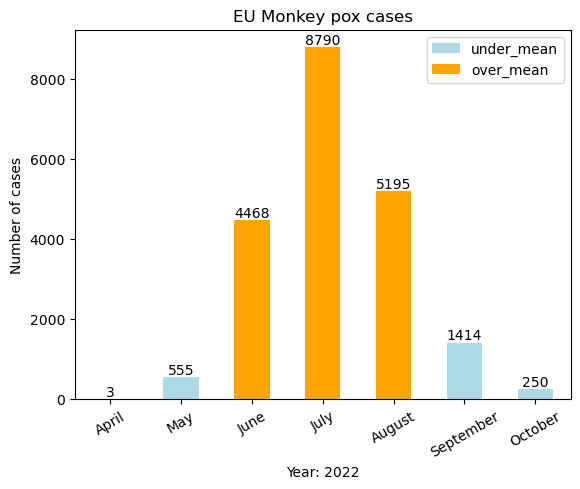

In [1]:
import pandas
from matplotlib import pyplot as plt
from matplotlib.patches import Patch
def vis_data_2():
    mpDf = pandas.read_json(r'./data/data_notebook-1_monkeypox.json')
    mpDf["DateRep"] = pandas.to_datetime(mpDf['DateRep'], format='%Y-%m-%d')
    
    # For Monthly aggregatated data
    temp2 = mpDf.groupby(mpDf.DateRep.dt.month)['ConfCases'].sum()
    data_aggregate2 = pandas.DataFrame({'month': temp2.index.tolist(), 'cases': temp2.values.tolist()})
    month_names = ['April', 'May', 'June', 'July', 'August', 'September', 'October']
    data_aggregate2['month_names'] = month_names
    
    print(data_aggregate2['cases'].mean())
    
    cases_color = [{c<=2954: 'lightblue', c>2954: 'orange'}[True] for c in data_aggregate2['cases']]
    color_legend = {"under_mean": "lightblue", "over_mean": "orange"}
    
    plotData = data_aggregate2.reindex(columns= ['month', 'month_names', 'cases'])
    
    a1 = data_aggregate2.plot(x='month_names', y='cases',kind="bar", color=cases_color)
    a1.legend([Patch(facecolor=color_legend['under_mean']),Patch(facecolor=color_legend['over_mean'])], ["under_mean", "over_mean"])
    a1.bar_label(a1.containers[0])
    plt.xticks(rotation=30, horizontalalignment="center")
    plt.title("EU Monkey pox cases")
    plt.xlabel("Year: 2022")
    plt.ylabel("Number of cases")
    
if __name__ == '__main__':
    vis_data_2()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the data source supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

- We want to retrieve value about the EU Monkey pox cases since their recording (until task 2). 
- The bar plot is choosen, because the numerical value can be easily read from the plot. It also is the most fastest and most accurate visualization type which is in important to show epidemiology data.
- The visualization shows for each month starting of observation the aggregated monkey pox cases in the EU. It also has two different colors: blue when the numbers are under the mean and orange when above the mean of the monky pox cases.
- It contributes that we can easily compare the aggregated EU data of covid-19 cases with the monkey pox cases. With these two bar plots we can compare on the first look, if a month has more cases than others -> a first look for a possible correlation.

-----
## Step 3  (6 points)

Merge the two data sets (or, relevant subsets thereof) based on your project idea from Assignment 2. Select, implement and describe one visualisation on the combined data set. Make sure you visualize variables taken from both original data sets.

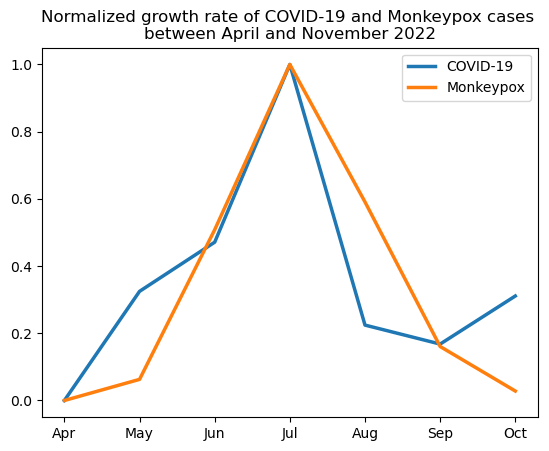

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json

data1 = pd.read_csv("./data/data_notebook-1_extcovid.csv")
data2 = pd.read_json("./data/data_notebook-1_monkeypox.json")

data2['DateRep'] = pd.to_datetime(data2['DateRep'], errors='coerce')
data1['dateRep'] = pd.to_datetime(data1['dateRep'], errors='coerce')

data1['cases'] = data1['cases'].astype('Int64') # make covid cases 'int64' instead of 'float64'

data1['dateRep'] = data1['dateRep'].dt.month   # we are interested in monthly data
data2['DateRep'] = data2['DateRep'].dt.month

grouped_data1 = data1.groupby('dateRep')['cases'].sum()    # grouping by month and covid cases
grouped_data2 = data2.groupby('DateRep')['ConfCases'].sum()   # grouping by month and monkeypox cases

grouped_data1 = grouped_data1.reset_index()
grouped_data2 = grouped_data2.reset_index()

grouped_data1.columns = ['Date', 'Cases_Covid']   # name the columns
grouped_data2.columns = ['Date', 'Cases_MonkeyPox']  # name the columns

merged_data = pd.merge(grouped_data1, grouped_data2, on=['Date'])  # merging two dataframes on months
merged_data['Date'] = merged_data['Date'].replace([4, 5, 6, 7, 8, 9, 10, 11], ["Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov"])

normalized_data = merged_data.copy() # create a copy of dataframe to normalize it
#function to normalize the data
def normalize(data):
    return (data - np.min(data)) / (np.max(data) - np.min(data))  

normalized_data['Cases_MonkeyPox'] = normalize(normalized_data['Cases_MonkeyPox'])
normalized_data['Cases_Covid'] = normalize(normalized_data['Cases_Covid'])
y_axis1 = normalized_data['Cases_MonkeyPox'].tolist()
y_axis2 = normalized_data['Cases_Covid'].tolist()
x_axis = normalized_data['Date'].tolist()

plt.plot(x_axis, y_axis2, linewidth = 2.5)
plt.plot(x_axis, y_axis1, linewidth = 2.5)
plt.title("Normalized growth rate of COVID-19 and Monkeypox cases \nbetween April and November 2022")
plt.gca().legend(('COVID-19','Monkeypox'))
plt.show()

Document your decision and describe the resulting visualisation. In your answer, cover the following aspects by referring explicitly to Saket et al. (2019):

* What is the task according to Saket et al. (2019) on the combined data set supported by the chosen visualisation?
* Why is the chosen visualisation effective for the given task?
* What does the visualisation show exactly?
* What does the visualisation contribute to answering your project's questions?

* Our visulisation of combined dataset supports finding correlations.  
* Since we wanted to find correlation between growth of confirmed number of cases of Covid and Monkeypox line chart is one of the best options for it. According to Saket et al. (2019) they have a higher speed and accuracy for finding correlations comparing to other visualisation methods.
* The visualization shows the normalized growth of Covid and Monkeypox cases of the same period of time (from April 2022 to November 2022). It is normalized because of the huge difference between number of cases of both diseases (at its peak in July there is 7175125 confirmed cases of Covid and only 8823 cases of Monkeypox). 
* From the visualization we can see that both diseases have their 'peak' month in July and have similar dynamics in growth (in both cases there is an increasing trend from April to July and decreasing trend from July to November). It is possible to make a conclusion that there is a correlation between growth of Covid and Monkeypox cases. We assume that there could be multiple reasons for these diseases to have similar growth rates (increase in Covid cases could make people socialize less or it could actually be a coincidence, to answer THIS questions additional researches are required). 

-----
## Step 4  (2 points)

Persist the merged dataset from Step 3 as a file.

In [4]:
merged_data.to_csv("./data/merged_dataset.csv")